# Import Necessary Libraries


In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

# Read the CSV files


In [161]:
historical_transaction_df = pd.read_csv(
    "Datasets\Historical-transaction-data.csv"
)
store_info_df = pd.read_csv("Datasets\Store-info.csv")
test_df = pd.read_csv("Datasets\Testing-data.csv")

# Check the dataframes


## Historical Transaction Data


In [162]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


In [163]:
historical_transaction_df.dtypes

item_description     object
transaction_date     object
invoice_id          float64
customer_id          object
shop_id              object
item_price            int64
quantity_sold         int64
dtype: object

In [164]:
historical_transaction_df.describe()

,invoice_id,item_price,quantity_sold
count,4.676540e+05,473974.000000,473974.000000
mean,1.996684e+06,206.689734,1.925506
std,1.344594e+06,166.764732,1.634535
min,1.700000e+01,35.000000,-1.000000
25%,1.032114e+06,100.000000,1.000000
50%,2.032996e+06,200.000000,2.000000
75%,3.032568e+06,220.000000,2.000000
max,8.331754e+06,17400.000000,101.000000


In [165]:
historical_transaction_df.isnull().sum()

item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
dtype: int64

### Store Info data


In [166]:
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low


In [167]:
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low


In [168]:
store_info_df.dtypes

shop_id            object
shop_area_sq_ft     int64
shop_profile       object
dtype: object

Contains the null values for the test data


In [169]:
store_info_df.isnull().sum()

shop_id             0
shop_area_sq_ft     0
shop_profile       24
dtype: int64

### Test data


In [170]:
test_df.head()

,shop_id,shop_profile
0,SHOP046,Low
1,SHOP024,Low
2,SHOP023,Low
3,SHOP097,Moderate
4,SHOP044,Low


In [171]:
test_df.drop(columns=["shop_profile"], inplace=True)

In [172]:
test_df.head()

,shop_id
0,SHOP046
1,SHOP024
2,SHOP023
3,SHOP097
4,SHOP044


In [173]:
test_df.shape

(24, 1)

# Extracting information from the historical transaction data


In [174]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


## 1. Fixing the Quantity column


Get the minimum value for the each beverage and fix the quantity column


In [175]:
min_prices = (
    historical_transaction_df[["item_description", "item_price"]]
    .groupby("item_description")["item_price"]
    .min()
    .to_dict()
)

# if item_name is in min_prices, then use min_prices[item_name] to calculate the quantity sold or use the existing quantity sold


def calculate_quantity_sold(row):
    if row["item_description"] in min_prices:
        return row["item_price"] // min_prices[row["item_description"]]
    elif row["quantity_sold"] == 0:
        return 1
    else:
        return row["quantity_sold"]


historical_transaction_df["quantity_sold"] = historical_transaction_df.apply(
    lambda row: calculate_quantity_sold(row), axis=1
)

historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3


In [176]:
historical_transaction_df["quantity_sold"].describe()

count    473974.000000
mean          1.464416
std           1.570627
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         100.000000
Name: quantity_sold, dtype: float64

## 2. Add Unit Price feature


In [177]:
historical_transaction_df["unit_price"] = (
    historical_transaction_df["item_price"]
    // historical_transaction_df["quantity_sold"]
)

historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,220
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1,220
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,160
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,150
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,70


## 3. Item description feature


#### Fixing the missing values

In [178]:
historical_transaction_df.isna().sum()

item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
unit_price              0
dtype: int64

There are missing values in Item description feature


In [179]:
# group by item_description and find the all the unique values of item_price
beverage_price_df = historical_transaction_df.groupby("item_description")[
    "item_price"
].unique()
beverage_price_df = pd.DataFrame(beverage_price_df)

In [180]:
beverage_price_df.head()

,item_price
item_description,
BOTTLED DRINKING WATER 1.5L,"[140, 70, 280, 420, 210, 560, 350, 490, 700, 6..."
BOTTLED DRINKING WATER 500ML,"[70, 35, 210, 245, 175, 105, 280, 805, 840, 14..."
CHOCOLATE MILK 180ML,"[350, 140, 70, 210, 280, 700, 1050, 490, 840, ..."
CREAM SODA 1.5L,"[220, 660, 440, 880, 1100, 1320, 1540, 2200, 2..."
CREAM SODA 1L,"[150, 300, 450, 600, 750, 1050, 900, 1200, 1500]"


In [181]:
# get the minimum price of each item
beverage_price_df["min_price"] = beverage_price_df["item_price"].apply(lambda x: min(x))

In [182]:
beverage_price_df.reset_index(inplace=True)

In [183]:
beverage_price_df.head(37)

,item_description,item_price,min_price
0,BOTTLED DRINKING WATER 1.5L,"[140, 70, 280, 420, 210, 560, 350, 490, 700, 6...",70
1,BOTTLED DRINKING WATER 500ML,"[70, 35, 210, 245, 175, 105, 280, 805, 840, 14...",35
2,CHOCOLATE MILK 180ML,"[350, 140, 70, 210, 280, 700, 1050, 490, 840, ...",65
3,CREAM SODA 1.5L,"[220, 660, 440, 880, 1100, 1320, 1540, 2200, 2...",220
4,CREAM SODA 1L,"[150, 300, 450, 600, 750, 1050, 900, 1200, 1500]",150
5,CREAM SODA 500ML,"[100, 200, 300, 600, 400, 1000, 500, 1100, 700...",100
6,CREAM SODA APPLE POP 1L,"[150, 750, 450, 300, 600, 900, 1950]",150
7,DRY GINGER ALE PET 500ML,"[320, 480, 300, 160, 150, 640, 1280, 450, 2400...",150
8,FIT O MANGO 1L,"[290, 270, 580, 810, 540, 870, 1080, 1450, 232...",270
9,FIT O MANGO 200ML,"[60, 120, 360, 70, 180, 240, 480, 140, 490, 72...",60


Get the beverages with their frequencies


In [184]:
# get the beverages with frequencies from historical_transaction_df
beverage_freq_df = (
    historical_transaction_df.groupby("item_description")["item_description"]
    .count()
    .reset_index(name="frequency")
)
beverage_freq_df = pd.DataFrame(beverage_freq_df)
beverage_freq_df.head()

,item_description,frequency
0,BOTTLED DRINKING WATER 1.5L,9194
1,BOTTLED DRINKING WATER 500ML,15786
2,CHOCOLATE MILK 180ML,40
3,CREAM SODA 1.5L,39608
4,CREAM SODA 1L,3668


In [185]:
# sort the dataframe by frequency
beverage_freq_df.sort_values(by="frequency", ascending=False, inplace=True)
beverage_freq_df.head()

,item_description,frequency
14,GINGER BEER 1.5L,59864
3,CREAM SODA 1.5L,39608
5,CREAM SODA 500ML,34320
15,GINGER BEER 1L,26808
27,ORANGE BARLEY 1.5L,23180


In [186]:
beverage_freq_df = pd.merge(beverage_freq_df, beverage_price_df, on="item_description")

In [187]:
beverage_freq_df.head(37)

,item_description,frequency,item_price,min_price
0,GINGER BEER 1.5L,59864,"[220, 660, 440, 880, 1100, 1320, 1540, 1980, 1...",220
1,CREAM SODA 1.5L,39608,"[220, 660, 440, 880, 1100, 1320, 1540, 2200, 2...",220
2,CREAM SODA 500ML,34320,"[100, 200, 300, 600, 400, 1000, 500, 1100, 700...",100
3,GINGER BEER 1L,26808,"[150, 300, 450, 750, 600, 1050, 900, 1650, 195...",150
4,ORANGE BARLEY 1.5L,23180,"[220, 660, 440, 880, 1100, 1760, 1320, 3960, 2...",220
5,NECTO 1.5L,21746,"[220, 440, 660, 1320, 880, 1100, 1540, 2200, 2...",220
6,SODA 500ML,16802,"[70, 140, 210, 420, 280, 700, 350, 910, 770, 5...",70
7,BOTTLED DRINKING WATER 500ML,15786,"[70, 35, 210, 245, 175, 105, 280, 805, 840, 14...",35
8,SODA PET 1.5L,15652,"[160, 150, 320, 450, 640, 960, 480, 300, 1600,...",150
9,FIT O ORANGE 1L,15392,"[290, 270, 580, 870, 540, 1160, 1450, 2610, 20...",270


In [188]:
price_dict = {}

for row in beverage_freq_df.itertuples():
    if row.min_price not in price_dict:
        price_dict[row.min_price] = row.item_description

print(price_dict)

{220: 'GINGER BEER 1.5L', 100: 'CREAM SODA 500ML', 150: 'GINGER BEER 1L', 70: 'SODA 500ML', 35: 'BOTTLED DRINKING WATER 500ML', 270: 'FIT O ORANGE 1L', 110: 'SODA 1L', 60: 'FIT O ORANGE 200ML', 80: 'GINGER BEER SUGAR FREE 500ML', 65: 'STRAWBERRY MILK 180ML', 120: 'LEMONADE 1L', 650: 'LIME CRUSH JUICE 1L'}


In [189]:
prices = list(price_dict.keys())
prices.sort()
prices

[35, 60, 65, 70, 80, 100, 110, 120, 150, 220, 270, 650]

Now we have the price and the corresponding popular beverages </br>
So we can impute the missing values in the Item description feature using the price_dict </br>


In [190]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,220
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1,220
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,160
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,150
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,70


In [191]:
from bisect import bisect

def find_nearest_price(price):
    i = bisect(prices, price)
    if i == 0:
        return prices[0]
    if i == len(prices):
        return prices[-1]
    before = prices[i - 1]
    after = prices[i]
    if after - price < price - before:
        return after
    else:
        return before

In [192]:
# for the missing values of item_description, using the unit_price fill the missing values
def fill_missing_item_description(row):
    # check if a value of row["item_description"] is null or not

    if row["item_description"] is np.NAN or row["item_description"] is np.NaN or not row['item_description']:
        if row["unit_price"] in price_dict:
            return price_dict[row['unit_price']]
        else:
            # print(f"{row['item_description']} {row['unit_price']}")
            return price_dict[find_nearest_price(row['unit_price'])]
    else:
        return row["item_description"]


historical_transaction_df["item_description"] = historical_transaction_df.apply(
    lambda row: fill_missing_item_description(row), axis=1
)

historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,220
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1,220
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,160
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,150
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,70


In [193]:
historical_transaction_df.isna().sum()

item_description       0
transaction_date       0
invoice_id          6320
customer_id            0
shop_id                0
item_price             0
quantity_sold          0
unit_price             0
dtype: int64

#### Splitting the item description


Item description is a categorical feature. We can extract the following information from the item description feature: </br>

-   Beverage Name
-   Beverage Volume in liters


In [194]:
historical_transaction_df["item_description"].unique()

array(['ORANGE BARLEY 1.5L', 'GINGER BEER 1.5L', 'TONIC PET 500ML',
       'CREAM SODA 1L', 'STRAWBERRY MILK 180ML', 'CREAM SODA 1.5L',
       'TWISTEE APPLE 1L', 'FIT O MIXED FRUIT 200ML', 'SODA PET 1.5L',
       'FIT O MIXED FRUIT 1L', 'KIK COLA 1L', 'LEMONADE 500ML',
       'FIT O ORANGE 1L', 'NECTO 1.5L', 'LEMONADE 1.5L', 'GINGER BEER 1L',
       'FIT O MANGO 200ML', 'FIT O MANGO 1L', 'CREAM SODA 500ML',
       'FIT O ORANGE 200ML', 'CREAM SODA APPLE POP 1L',
       'BOTTLED DRINKING WATER 500ML', 'SODA 500ML', 'GINGER BEER 500ML',
       'SODA 1L', 'NECTO 500ML', 'ORANGE CRUSH 500ML',
       'BOTTLED DRINKING WATER 1.5L', 'NECTO 1L',
       'GINGER BEER SUGAR FREE 500ML', 'ORANGE CRUSH 1.5L',
       'DRY GINGER ALE PET 500ML', 'LEMONADE 1L', 'ORANGE CRUSH 1L',
       'GINGER BEER 400ML', 'CHOCOLATE MILK 180ML', 'LIME CRUSH JUICE 1L'],
      dtype=object)

In [195]:
historical_transaction_df["item_description"].nunique()

37

In [196]:
historical_transaction_df[["item_name", "item_quantity"]] = historical_transaction_df["item_description"].str.rsplit(
    " ", n=1, expand=True
)

In [197]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_quantity
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,220,ORANGE BARLEY,1.5L
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1,220,GINGER BEER,1.5L
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,160,TONIC PET,500ML
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,150,CREAM SODA,1L
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,70,STRAWBERRY MILK,180ML


In [198]:
def convert_to_liters(value):
    try:
        if value[-2:] == "ML":
            return float(value[:-2]) / 1000
        else:
            return float(value[:-1])
    except:
        print("Error!!")
        return np.NaN

In [199]:
historical_transaction_df["item_volume_in_liters"] = historical_transaction_df["item_quantity"].apply(
    lambda x: convert_to_liters(x)
)

In [200]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_quantity,item_volume_in_liters
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,220,ORANGE BARLEY,1.5L,1.50
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1,220,GINGER BEER,1.5L,1.50
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,160,TONIC PET,500ML,0.50
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,150,CREAM SODA,1L,1.00
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,70,STRAWBERRY MILK,180ML,0.18


In [201]:
historical_transaction_df.drop(["item_quantity"], axis=1, inplace=True)

In [202]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_volume_in_liters
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,220,ORANGE BARLEY,1.50
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1,220,GINGER BEER,1.50
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,160,TONIC PET,0.50
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,150,CREAM SODA,1.00
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,70,STRAWBERRY MILK,0.18


## 4. Item_price and Quantity_sold features

Check for possible outliers

<Axes: xlabel='quantity_sold', ylabel='shop_id'>

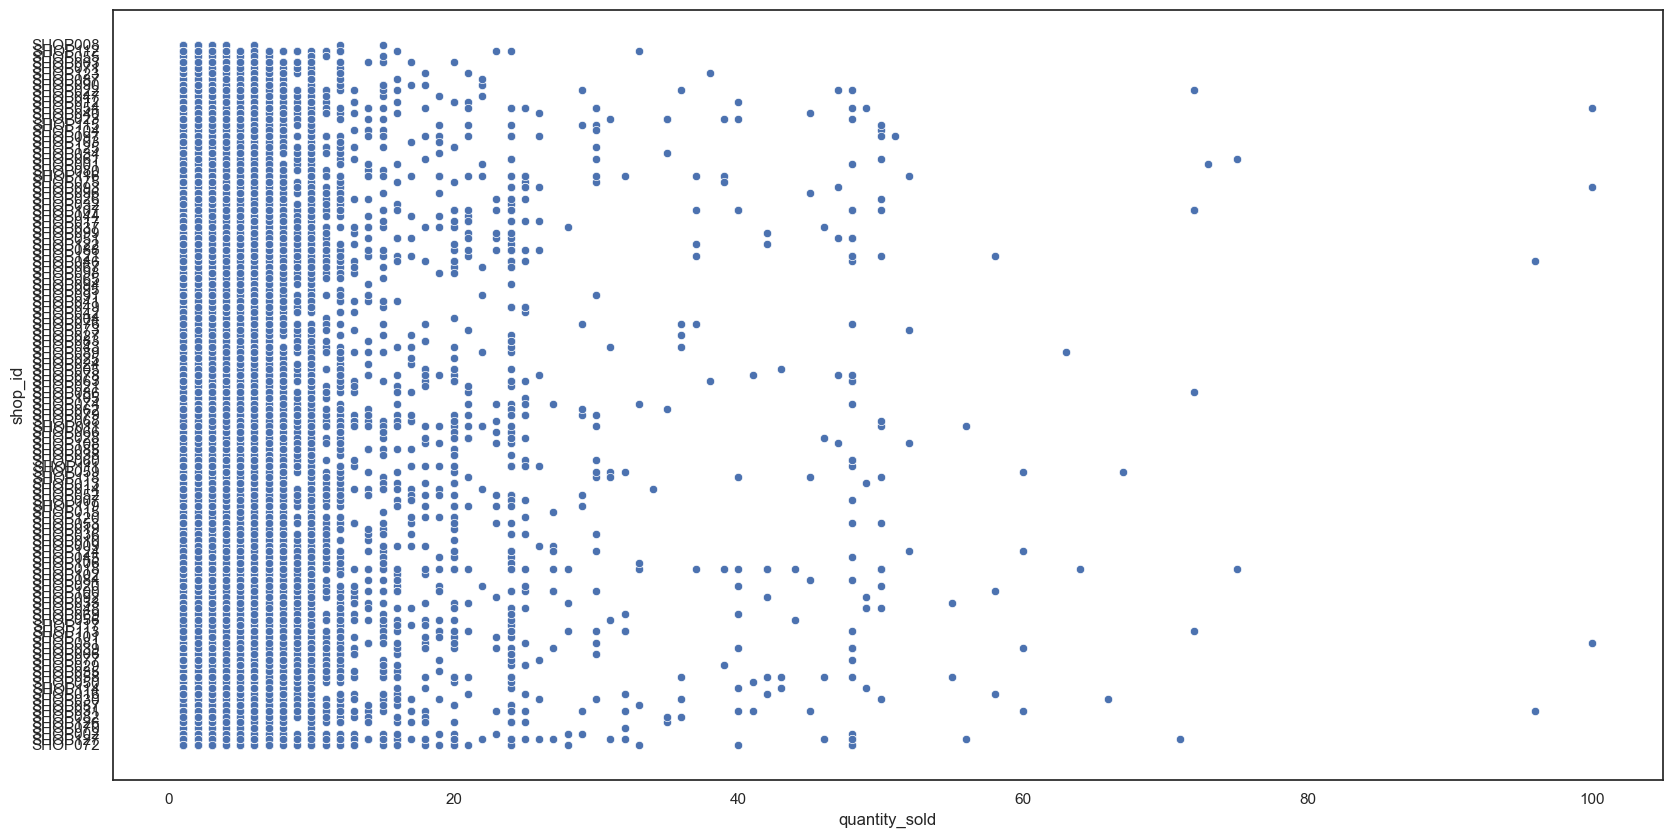

In [140]:
# plot the values of quantity_sold and shop_id
plt.figure(figsize=(20, 10))
sns.scatterplot(x="quantity_sold", y="shop_id", data=historical_transaction_df)

<Axes: xlabel='item_price', ylabel='shop_id'>

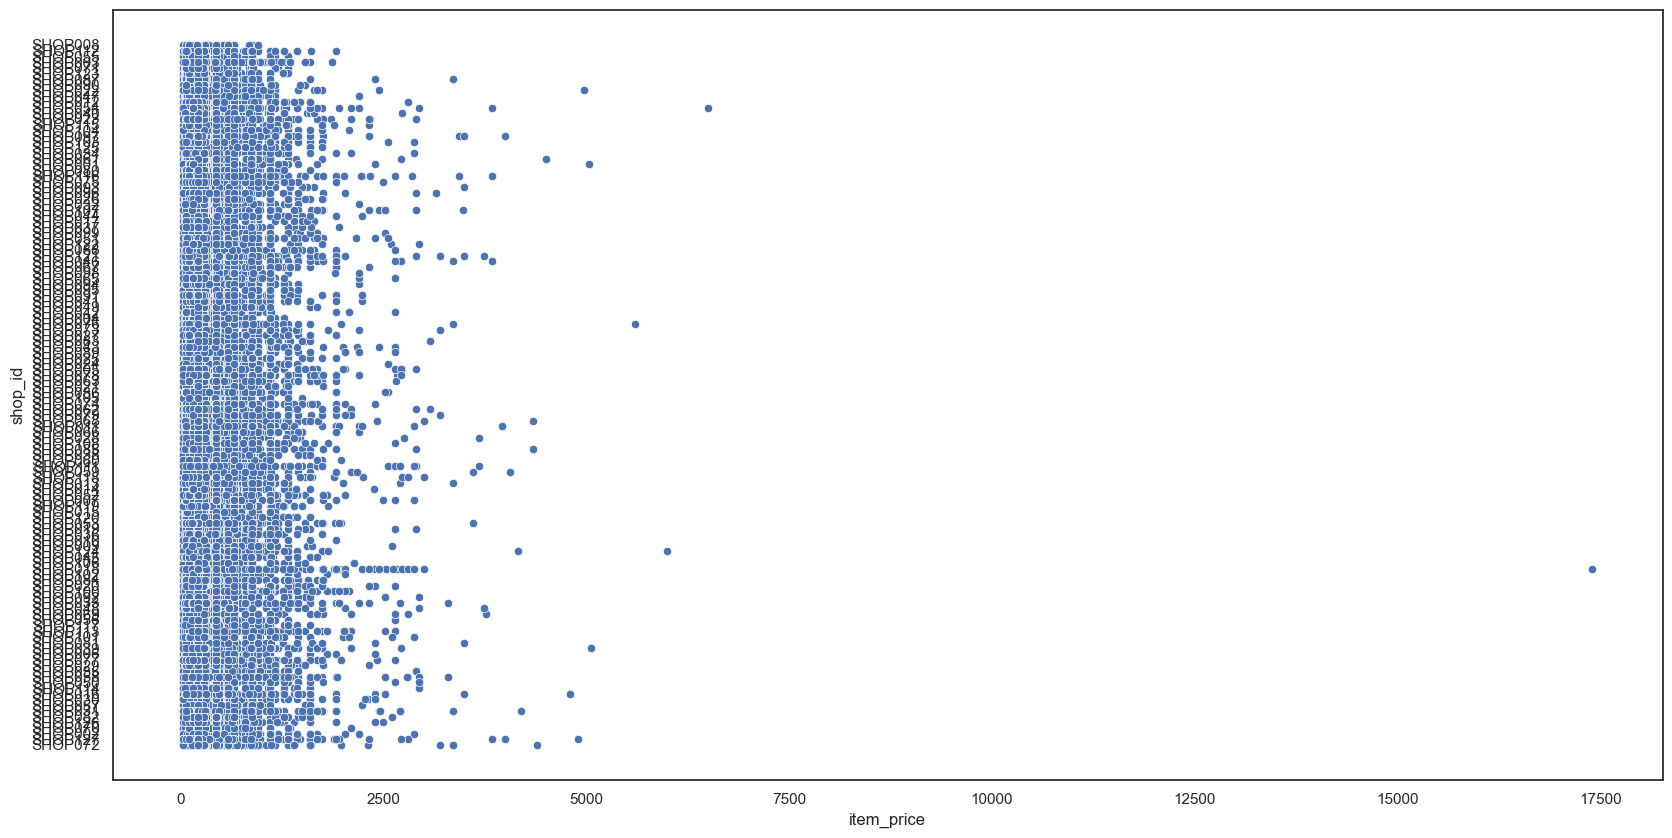

In [141]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="item_price", y="shop_id", data=historical_transaction_df)

In [153]:
historical_transaction_df['quantity_sold'].describe()

count    473974.000000
mean          1.464416
std           1.570627
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         100.000000
Name: quantity_sold, dtype: float64

Finding outliers using z-score

In [156]:
def find_outliers(df, column_name):
    mean = historical_transaction_df[column_name].mean()
    std = historical_transaction_df[column_name].std()
    outliers = []
    for value in df[column_name]:
        z_score = (value - mean) / std
        if np.abs(z_score) > 3:
            outliers.append(value)
    return outliers

In [158]:
len(find_outliers(historical_transaction_df, 'quantity_sold'))

3967

In [154]:
historical_transaction_df['item_price'].describe()

count    473974.000000
mean        206.689734
std         166.764732
min          35.000000
25%         100.000000
50%         200.000000
75%         220.000000
max       17400.000000
Name: item_price, dtype: float64

In [159]:
len(find_outliers(historical_transaction_df, 'item_price'))

5566

In [203]:
def remove_outliers_using_z_score(df, column):
    mean = df[column].mean()
    std = df[column].std()
    df = df[abs(df[column] - mean) / std < 3]
    return df

In [ ]:
# Remove the outliers from historical_transaction_df
# Have to decide whether to remove it from item_price or quantity_sold


## 5. Working with Invoice_id

In [208]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_volume_in_liters
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,220,ORANGE BARLEY,1.50
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1,220,GINGER BEER,1.50
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,160,TONIC PET,0.50
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,150,CREAM SODA,1.00
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,70,STRAWBERRY MILK,0.18


In [204]:
historical_transaction_df.isna().sum()

item_description            0
transaction_date            0
invoice_id               6320
customer_id                 0
shop_id                     0
item_price                  0
quantity_sold               0
unit_price                  0
item_name                   0
item_volume_in_liters       0
dtype: int64

There are missing values in the invoice_id

In [209]:
invoice_df = historical_transaction_df.groupby(["shop_id", "invoice_id"])["item_price"].sum().reset_index(name="price_per_invoice")
invoice_df = pd.DataFrame(invoice_df)
invoice_df.head()

,shop_id,invoice_id,price_per_invoice
0,SHOP001,71216.0,220
1,SHOP001,71241.0,220
2,SHOP001,71244.0,520
3,SHOP001,71249.0,220
4,SHOP001,71278.0,130
